In [5]:
import pandas as pd 
#for the importing dataset
import numpy as np
%matplotlib inline 
#to plot the whatever graphic
import matplotlib.pyplot as plt #plot data
#import common libaries
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

2015-09-07     3861.9
2015-09-08     3994.2
2015-09-09     4060.3
2015-09-10     4020.6
2015-09-11     3928.1
               ...   
2022-11-24    14350.0
2022-11-25    15300.0
2022-11-28    16350.0
2022-11-29    17400.0
2022-11-30    18400.0
Name: price, Length: 1812, dtype: float64

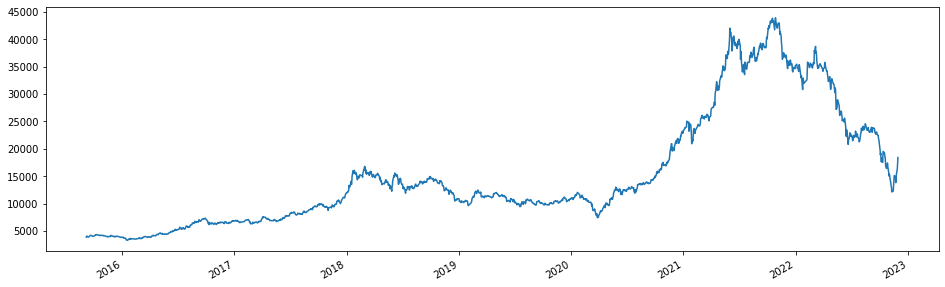

In [10]:
#import the dataset 
HPG=pd.read_csv(r"/content/HoaPhatdataset (3).csv")
HPG.index = HPG['date']
# Convert the 'date' column to a datetime data type
HPG['date']=pd.to_datetime(HPG.date,format='%m/%d/%Y')
#set the date as the index
HPG=HPG.set_index(pd.DatetimeIndex(HPG['date'].values))
HPG['Time'] = np.arange(len(HPG.index))
HPG['price'].plot(figsize=(16,5))
HPG['price']

,price,Open,High,Low,Time
count,1812.00000,1812.000000,1812.000000,1812.000000,1812.000000
mean,15288.53819,15294.660375,15508.131623,15089.505408,905.500000
std,10456.63874,10482.328760,10623.617303,10328.726382,523.223662
min,3280.00000,3187.400000,3293.200000,3161.000000,0.000000
25%,7739.47500,7728.450000,7808.575000,7660.925000,452.750000
50%,11578.70000,11605.100000,11727.400000,11435.350000,905.500000
75%,20906.90000,20704.500000,21422.550000,20470.600000,1358.250000
max,43895.80000,43895.800000,44198.500000,43517.400000,1811.000000


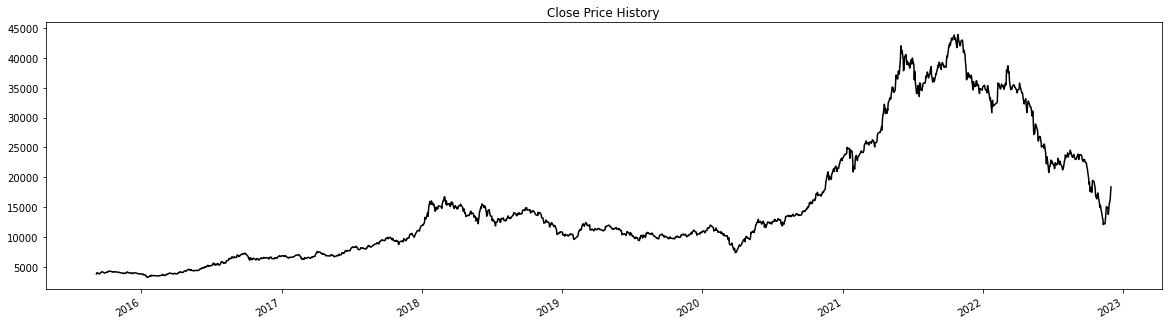

In [11]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Close Price History')
#the figure has 2 row, 1 columns, and this plot is the first plot. 
HPG['price'].plot(style="k")
# plt.subplot(2, 1, 2)
# #the figure has 2 row, 1 columns, and this plot is the second plot. 
# POW['Vol'].plot(style="k")
# plt.title('Volume History')
HPG.describe()

Kiem dinh ADF coi thu chuoi co nghiem don vi hay khong va tinh dung





In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(HPG['price'].dropna() )
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -3.3663943638018137 
p-value: 0.012159244536145706 
Critical value : {} 
	1%: -3.4339921916016345
	5%: -2.8631488249300574
	10%: -2.5676264862577503
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


The output above shows that the p-value is greater than the significance level of 0.05, so we fail to reject the null hypothesis. The series is not stationary and requires differencing.

In [13]:
from statsmodels.tsa.statespace.tools import diff
result = adfuller(HPG['price'].diff().dropna() )
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -6.387571006905839 
p-value: 2.145321497295357e-08 
Critical value : {} 
	1%: -3.43401669852096
	5%: -2.863159643456451
	10%: -2.5676322468019896
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [1]:
! pip install pmdarima
import warnings 
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pmdarima as pm

In [16]:
model  = pm.auto_arima(HPG['price'],
                      test='adf',       # use adftest to find optimal 'd' # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)     # set to stepwise
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26962.426, Time=2.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26970.815, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26967.001, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26966.295, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26969.496, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26965.182, Time=1.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26964.639, Time=1.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26956.610, Time=7.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26966.021, Time=1.00 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=26956.315, Time=4.98 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=26967.147, Time=1.27 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=26951.608, Time=5.80 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=26960.740, Time=3.27 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.27 sec
 ARIMA(4,1,3)(0,0,0)[0] i

In the above output, the lowest AIC value of Best model:  ARIMA(4,1,0), and that is used as the final estimator.

> Indented block



